# Bellevue University
## Spring 2022
### DSC 650 : Big Data
### Week 5 : Machine Learning Fundamentals

#### Assignment 5.2
04/15/2022
##### By: Yograj Karki

### Classifying newswires: A multiclass classification example


In this assignment, you will be reproducing the models described in the examples from chapter three of Deep Learning with Python. You will use that code to create a Luigi pipeline that trains the model, uses the model to perform model validation, and output model metrics. <p> </p>

Assignment 5.2<p> </p>
Implement the news classifier found in section 3.5 of Deep Learning with Python.

#### Loading the Reuters dataset



In [1]:
# Import libraries
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text



In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

#### Preparing the data, encoding the input data


In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the model

In [11]:
from tensorflow import keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### Validation: setting aside a validation set

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training your model

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 2.4021 - accuracy: 0.5564 - val_loss: 1.5891 - val_accuracy: 0.6630
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.3199 - accuracy: 0.7171 - val_loss: 1.2410 - val_accuracy: 0.7310
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0008 - accuracy: 0.7844 - val_loss: 1.0926 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7945 - accuracy: 0.8335 - val_loss: 1.0038 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6323 - accuracy: 0.8672 - val_loss: 0.9588 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5062 - accuracy: 0.8929 - val_loss: 0.9184 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4070 - accuracy: 0.9139 - val_loss: 0.8858 - val_accuracy: 0.8180
Epoch 8/20
16

### Plotting the training and validation loss


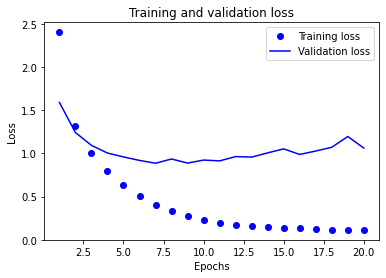

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy



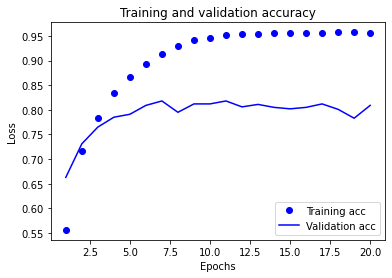

In [16]:
plt.clf() # clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch


In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
              partial_y_train,
              epochs=8,
              batch_size=512,
              validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 20ms/step - loss: 2.6901 - accuracy: 0.5099 - val_loss: 1.7666 - val_accuracy: 0.6360
Epoch 2/8
16/16 [==============================] - 0s 16ms/step - loss: 1.4286 - accuracy: 0.7050 - val_loss: 1.3147 - val_accuracy: 0.7120
Epoch 3/8
16/16 [==============================] - 0s 16ms/step - loss: 1.0535 - accuracy: 0.7751 - val_loss: 1.1279 - val_accuracy: 0.7570
Epoch 4/8
16/16 [==============================] - 0s 15ms/step - loss: 0.8338 - accuracy: 0.8208 - val_loss: 1.0581 - val_accuracy: 0.7710
Epoch 5/8
16/16 [==============================] - 0s 16ms/step - loss: 0.6718 - accuracy: 0.8555 - val_loss: 0.9735 - val_accuracy: 0.7930
Epoch 6/8
16/16 [==============================] - 0s 18ms/step - loss: 0.5404 - accuracy: 0.8879 - val_loss: 0.9669 - val_accuracy: 0.7870
Epoch 7/8
16/16 [==============================] - 0s 14ms/step - loss: 0.4357 - accuracy: 0.9099 - val_loss: 0.9388 - val_accuracy: 0.7900
Epoch 8/8
71/71 [===

In [18]:
results

[0.9860212802886963, 0.7849510312080383]

### Using a trained model to generate predictions on new data


In [19]:
model.predict(x_test)

array([[4.0195420e-05, 8.0812344e-04, 8.1026490e-05, ..., 2.1842628e-04,
        9.4142679e-06, 5.2067015e-05],
       [7.5452519e-03, 3.4255823e-01, 1.5408003e-02, ..., 4.0920463e-06,
        5.8121841e-06, 7.7078017e-05],
       [1.5027105e-02, 8.2702899e-01, 3.5517414e-03, ..., 8.8589768e-05,
        3.3810938e-05, 2.2726005e-04],
       ...,
       [2.7957276e-05, 2.5115258e-04, 3.2506266e-04, ..., 1.2357664e-04,
        1.3919294e-04, 1.2724745e-04],
       [2.3511972e-03, 1.1817598e-01, 9.0955161e-03, ..., 9.7529817e-04,
        5.8719533e-04, 6.7656027e-04],
       [2.3321456e-03, 7.5001681e-01, 1.3095597e-02, ..., 1.5755433e-06,
        3.0396122e-05, 4.4349341e-05]], dtype=float32)